<a href="https://colab.research.google.com/github/zongqi-wang/578-Data-Visualization/blob/main/Data_Exploration_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 578 Data Visualization Group 9 Data Exploration and Visualization

This is a group project for the CSE 578 class. The goal of this project is to find factors that determine one's income using the United States Census Bureau data set. The data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/).


### Group Members:

*   Mahan Abbasian
*   Jeffrey Cheng
* Disha Harishkumar
* Prasanth Sivanappan Sobhana
* Zongqi Wang
* Injae Wi



In [35]:
# Loading required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

In [10]:
# URL of the data. They have been uploaded to Github for easy and public access
train_data_url = 'https://raw.githubusercontent.com/zongqi-wang/578-Data-Visualization/main/adult.data'
test_data_url = 'https://raw.githubusercontent.com/zongqi-wang/578-Data-Visualization/main/adult.test'

## Loading data set into train and test data frames

Training data and Testing data are loaded in seperately. Their column names are as follows:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* 50k: Binary. >50k or <=50k. We will use this as the dependent variable

In [30]:
#loading training data
train_dat = pd.read_csv(train_data_url, index_col=False,
                        names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                                 "marital-status", "occupation", "relationship", "race", 
                                 "sex", "capital-gain", "capital-loss", "hours-per-week", 
                                 "native-country", '50k'],
                        dtype = {
                            'age': np.int32, 
                            'workclass': 'category',
                            'fnlwgt': np.int32,
                            'education':'category',
                            'education-num': np.int32,
                            'marital-status':'category',
                            'occupation':'category',
                            'relationship':'category',
                            'race':'category',
                            'sex':'category',
                            'capital-gain': np.int32,
                            'capital-loss': np.int32,
                            'hours-per-week': np.int32,
                            'native-country': 'category',
                            '50k': 'category'
                        })
# Checking data
train_dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
#loading test data
test_dat = pd.read_csv(test_data_url, index_col=False,
                       skiprows = 1,
                        names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                                 "marital-status", "occupation", "relationship", "race", 
                                 "sex", "capital-gain", "capital-loss", "hours-per-week", 
                                 "native-country", '50k'],
                        dtype = {
                            'age': np.int32, 
                            'workclass': 'category',
                            'fnlwgt': np.int32,
                            'education':'category',
                            'education-num': np.int32,
                            'marital-status':'category',
                            'occupation':'category',
                            'relationship':'category',
                            'race':'category',
                            'sex':'category',
                            'capital-gain': np.int32,
                            'capital-loss': np.int32,
                            'hours-per-week': np.int32,
                            'native-country': 'category',
                            '50k': 'category'
                        })
test_dat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


## Data Exploration:

First, let's check for training data's basic information.

In [69]:
def basic_data_info(data):
  print("----------Missing value-----------")
  print(data.isnull().sum())
  print("----------Null value-----------")
  print(data.isna().sum())
  print("----------Shape of Data----------")
  print(data.shape)

In [70]:
basic_data_info(train_dat)

----------Missing value-----------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k               0
dtype: int64
----------Null value-----------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k               0
dtype: int64
----------Shape of Data----------
(32561, 15)


Seems like we don't have to worry about missing data. We will continue by producing a couple graphs of the data to gain a deeper understanding of it.

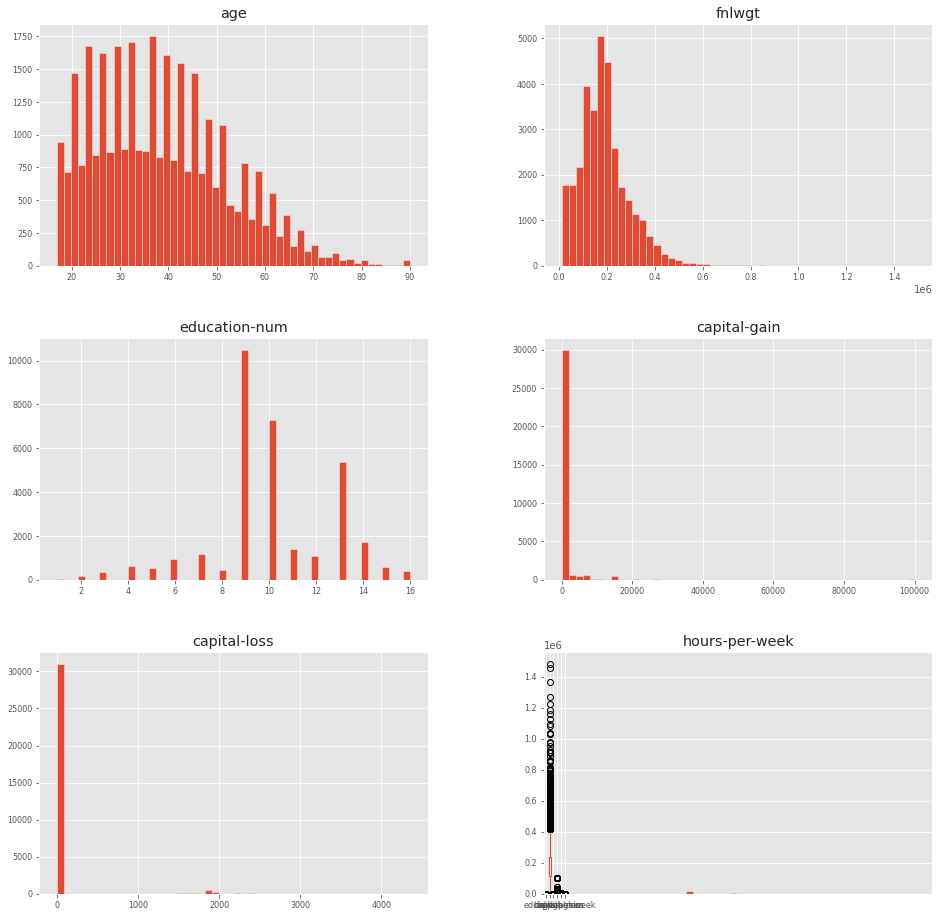

In [68]:
df_num = train_dat.select_dtypes(np.int32)
df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8)